## Final Project Submission

Please fill out:
* Student name: Kelvin Waters
* Student pace: online-ds-ft-012120
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL: 

All imports will be moved here upon completion of the notebook 

In [1]:
# imports required for the notebook
import pandas as pd 
import numpy as np


from scipy import stats
from importlib import reload

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import sklearn.metrics as metrics
import itertools

from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import helper_functions as hf


import warnings
warnings.filterwarnings('ignore')

In [2]:
reload(hf)

<module 'helper_functions' from 'C:\\Users\\kelvi\\flatiron\\section03\\dsc-mod-3-project-v2-1-onl01-dtsc-ft-012120\\helper_functions.py'>

In [3]:
# importing the data
df = pd.read_csv('creditcard.csv')
# first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

0    284315
1       492
Name: Class, dtype: int64

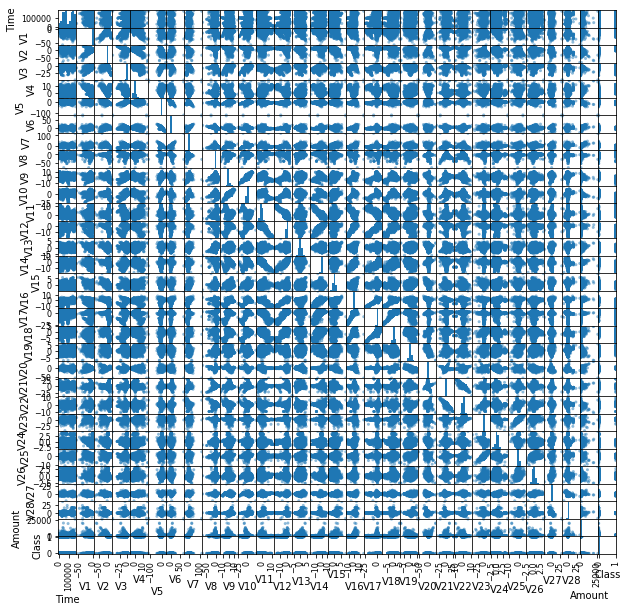

In [33]:
pd.plotting.scatter_matrix(df, figsize=(10,10));
df.Class.value_counts()

In [4]:
df.shape

(284807, 31)

In [5]:
# all but the target value are continuous
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# not much to describe here, this dataset has already been cleaned and normalized
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# no missing data
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

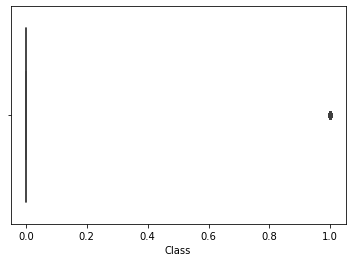

In [8]:
# checking for outliers in the dataset, just to be sure
sns.boxplot(x=df.Class)

In [9]:
df.shape

(284807, 31)

In [10]:
# checking outliers based on zscore < 3 value
# not sure if taking zscore values on a normalized dataset
z = np.abs(stats.zscore(df))
print(z)

[[1.99658302 0.69424232 0.04407492 ... 0.06378115 0.24496426 0.04159898]
 [1.99658302 0.60849633 0.16117592 ... 0.04460752 0.34247454 0.04159898]
 [1.99656197 0.69350046 0.81157783 ... 0.18102083 1.16068593 0.04159898]
 ...
 [1.6419735  0.98002374 0.18243372 ... 0.0804672  0.0818393  0.04159898]
 [1.6419735  0.12275539 0.32125034 ... 0.31668678 0.31324853 0.04159898]
 [1.64205773 0.27233093 0.11489898 ... 0.04134999 0.51435531 0.04159898]]


In [11]:
# this would remove all the 1 values from the target Class!
# df = df[(z < 3).all(axis= 1)]

In [12]:
# loss of 37,864 rows
df.shape

(284807, 31)

This dataset is HIGHLY imbalanced!

In [13]:
# preprocessing to address the imbalance of this dataset will have to be performed 
# before any training/testing can occur. 
# machine learing algorithms tend to show a bias towards majority features
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Let's try a K-Nearest Neighbor model on this imbalanced dataset!

In [14]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

split the data

In [15]:
X = df.iloc[:,:-1] # all rows and minus the last column
y = df.Class # only the Class column/Series as our target
print(y.value_counts())

0    284315
1       492
Name: Class, dtype: int64


train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

fit model

In [17]:
# using the default values of n_neighbors= 5
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

predict

In [18]:
y_pred = model.predict(X_test)

check accuracy

In [19]:
print(accuracy_score(y_test, y_pred))
pd.crosstab(y_test, y_pred)

0.9983673326077034


col_0,0,1
Class,,
0,56864,0
1,93,5


In [20]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[56864     0]
 [   93     5]]


What's the best value for K? 

Text(0, 0.5, 'Testing Accuracy')

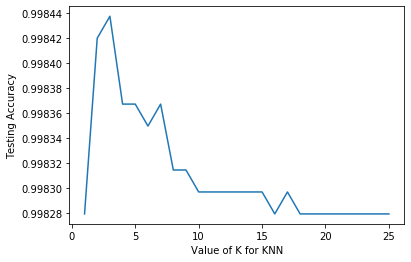

In [21]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

What options are available to address the imbalance? 
1. We can undersample '0' values, which would slash a HUGE amount of data points from the dataset. 
2. We can oversample '1' values which would double to the amount of data points on the dataset

SMOTE: synthetic minority oversampling technique

In [22]:
smote = SMOTE() # instatiate a smote obj

In [23]:
# apply smote to training data NOT the testing data
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [24]:
# verifying the 'smoting' results!
# more data points is preferable than fewer data points when it comes to machine learning
print('Before SMOTE :', Counter(y_train))
print('After SMOTE :', Counter(y_train_smote))

Before SMOTE : Counter({0: 227451, 1: 394})
After SMOTE : Counter({0: 227451, 1: 227451})


now let's try remodeling with a balanced dataset

In [25]:
# fit model 
model.fit(X_train_smote, y_train_smote)
# pred model
y_pred = model.predict(X_test)
# accuracy scoring
print(accuracy_score(y_test, y_pred))
pd.crosstab(y_test, y_pred)

0.9493697552754468


col_0,0,1
Class,,
0,54025,2839
1,45,53


In [26]:
# comparing true and predicted responses for shits and giggles. 
print('True:', y_test.values[0:25])# first 25 rows
print('False:', y_pred[0:25])

True: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
False: [1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
# confusion matrix looks very similiar to the pd.crosstab output
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[54025  2839]
 [   45    53]]


Can we locate an even better value for K? (Than the default n_neighbors= 5)

Text(0, 0.5, 'Testing Accuracy')

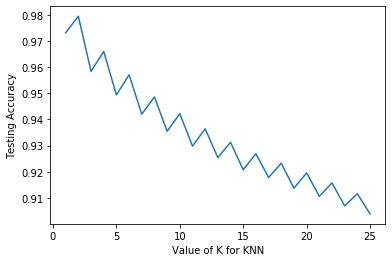

In [29]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train_smote, y_train_smote)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')  

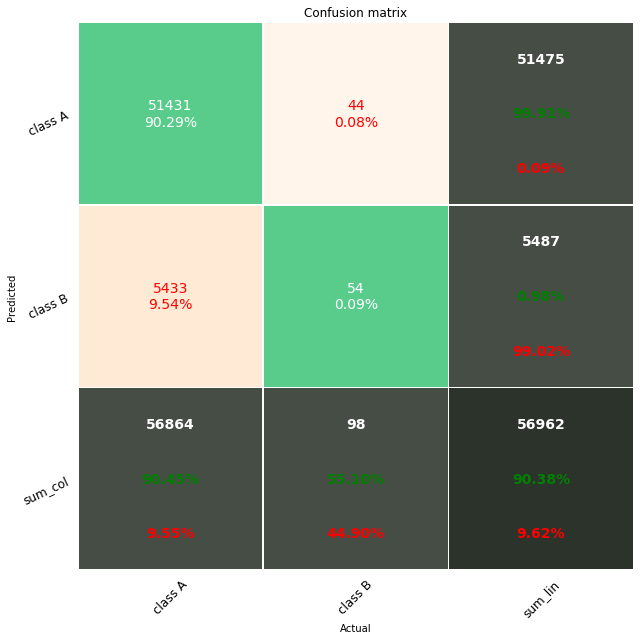

In [30]:
# pretty plot confusion_matrix
hf.plot_confusion_matrix_from_data(y_test, y_pred)

Let's build a pipeline for various

LogisticRegression

In [31]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_smote, y_train_smote)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train_smote)

residuals = np.abs(y_train_smote - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    438264
1     16638
Name: Class, dtype: int64
0    0.963425
1    0.036575
Name: Class, dtype: float64


AUC score

In [41]:
p_baseline = [y_train_smote.mean()] * len(y_test)
p_pred_test = model.predict_proba(X_test)[:, 1]

In [45]:
auc_base = roc_auc_score(y_test, p_baseline)
auc_test = roc_auc_score(y_test, p_pred_test)
print(auc_base)
print(auc_test)

0.5
0.7571889212212741


Pipeline 

In [39]:
from sklearn.pipeline import make_pipeline